In [1]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [2]:
import numpy as np
import time
import pickle
from pprint import pprint
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

from package.plots import diagnostic_plot, plot
from package.helpers.lens import Lens

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [29]:
data_dir = os.path.join('/data','bwedig', 'roman-population', 'data')
figure_dir = os.path.join(repo_path, 'figures')

In [4]:
csv_path = os.path.join(data_dir, 'dictparaggln_Area00000010.csv')
df = pd.read_csv(csv_path)

In [5]:
# df

In [6]:
df.columns

Index(['velodisp', 'massstel', 'angleins', 'redssour', 'redslens', 'xposlens',
       'yposlens', 'xpossour', 'ypossour', 'numbimag', 'magnsour',
       'maxmdistimag', 'magtlensF087', 'magtsourF087',
       'magtsourMagnifiedF087'],
      dtype='object')

In [32]:
limit = 16
lens_list = []

for i, row in df.iterrows():
    if i == limit:
        break
    lens = Lens(z_lens = row['redssour'], 
                z_source=row['redslens'], 
                sigma_v=row['velodisp'], 
                lens_x=row['xposlens'], 
                lens_y=row['yposlens'], 
                source_x=row['xpossour'], 
                source_y=row['ypossour'], 
                mag_lens=row['magtlensF087'], 
                mag_source=row['magtsourF087'])
    lens_list.append(lens)

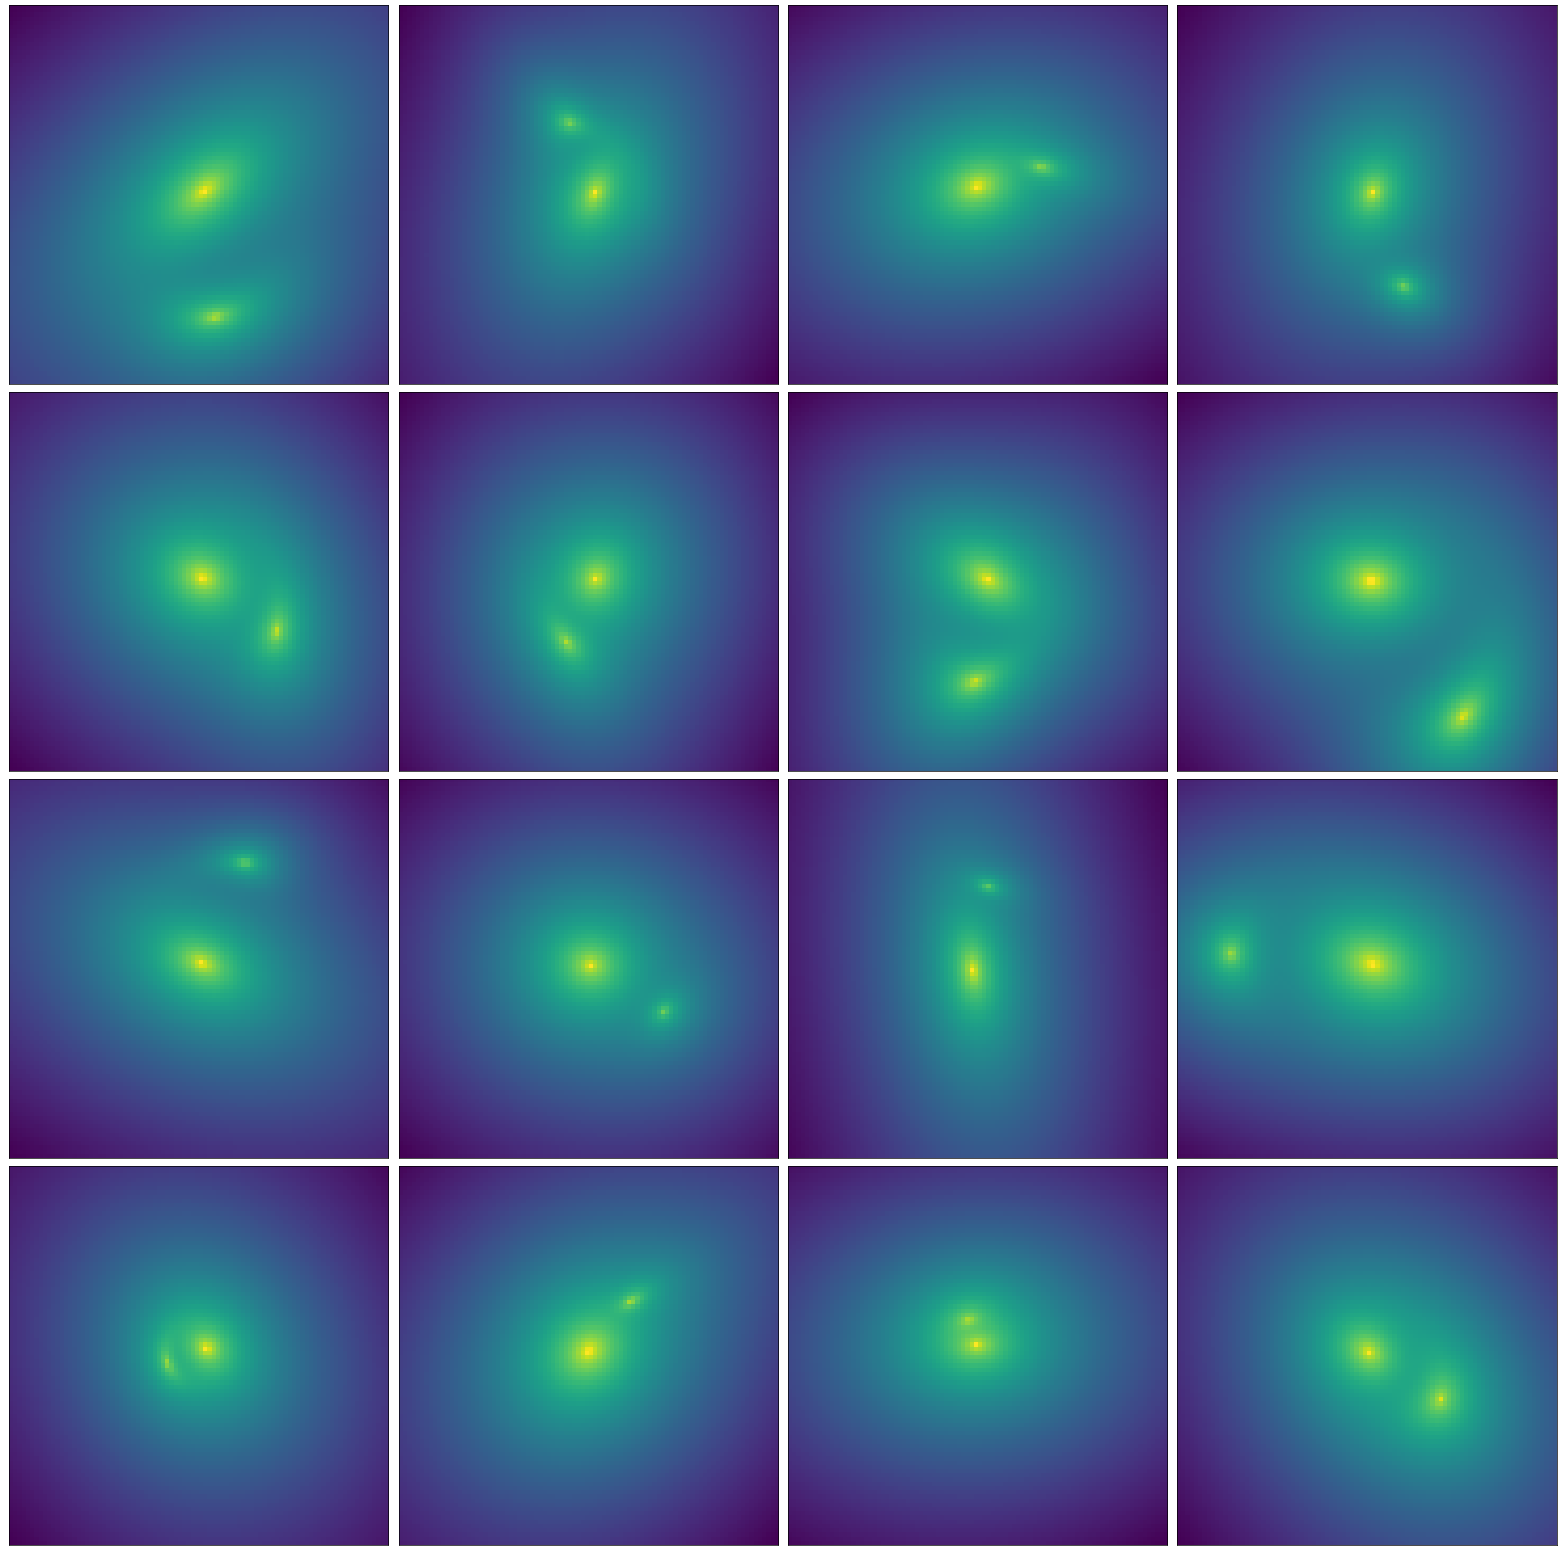

In [36]:
side = 4
f, ax = plt.subplots(nrows=side, ncols=side, figsize=(20, 20), gridspec_kw={'hspace': 0.02,'wspace':0.02})

for i, lens in enumerate(lens_list):
    model = lens.get_array(num_pix=90, side=10.)
    ax[i//side,i%side].imshow(np.log10(model), cmap='viridis')
    ax[i//side,i%side].get_xaxis().set_visible(False)
    ax[i//side,i%side].get_yaxis().set_visible(False)
    
plt.savefig(os.path.join(figure_dir, 'mosaic_models.png'))
plt.show()